In [1]:
import os.path
import pickle
import numpy as np
import pandas as pd

In [2]:
# load embedding
with open('../processed_data/embeddings_bin12.0.pkl', 'rb') as f:
    reducer_embeddings = pickle.load(f)

# load labels
with open('../processed_data/features_targets_bin12.0.pkl', 'rb') as f:
    [features, scaled_features, targets] = pickle.load(f)

## hdb scan clustering


In [7]:
import hdbscan
from sklearn.metrics import adjusted_mutual_info_score

def hdbscan_classification_ami(umap_embeddings, labels, cluster_range):
    cluster_ami = {}
    min_cluster_size = np.arange(cluster_range[0], cluster_range[1], 0.5)
    for min_c in min_cluster_size:
        print("min_cluster_size:", min_c)
        cluster_ami[min_c] = dict(retained_hierarchy= None, assignments=None, assign_prob=None, soft_assignments=None, ami=None)
        learned_hierarchy = hdbscan.HDBSCAN(
            prediction_data=True, min_cluster_size=int(round(min_c * 0.01 * umap_embeddings.shape[0]))).fit(umap_embeddings)
        #collect everything calculate the ami, export as dictionary
        cluster_ami[min_c]["ami"] = adjusted_mutual_info_score(labels, learned_hierarchy.labels_)
        #cluster_ami[min_c]["retained_hierarchy"] = learned_hierarchy
        cluster_ami[min_c]["assignments"] = learned_hierarchy.labels_
        print("Unique labels:", np.unique(learned_hierarchy.labels_, return_counts=True))
        #cluster_ami[min_c]["assign_prob"] = hdbscan.all_points_membership_vectors(learned_hierarchy)
        #cluster_ami[min_c]["soft_assignments"] = np.argmax(cluster_ami[min_c]["assign_prob"], axis=1)
        print("AMI:", cluster_ami[min_c]["ami"])

    return cluster_ami



In [8]:
cluster_range = [0.5, 10.5]

cluster_ami = hdbscan_classification_ami(reducer_embeddings,targets, cluster_range)


min_cluster_size: 0.5
Unique labels: (array([-1,  0,  1], dtype=int64), array([  137,   328, 41810], dtype=int64))
AMI: 0.006557663693777375
min_cluster_size: 1.0
Unique labels: (array([-1,  0,  1,  2], dtype=int64), array([ 5963, 18620, 11392,  6300], dtype=int64))
AMI: 0.23884028318075184
min_cluster_size: 1.5
Unique labels: (array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([14050,  5939, 10809,  1957,  1683,  6248,  1589], dtype=int64))
AMI: 0.19467542472791985
min_cluster_size: 2.0
Unique labels: (array([-1,  0,  1,  2], dtype=int64), array([ 9464, 16831, 10472,  5508], dtype=int64))
AMI: 0.21758284799227587
min_cluster_size: 2.5
Unique labels: (array([-1,  0,  1,  2], dtype=int64), array([10216, 16548, 10248,  5263], dtype=int64))
AMI: 0.21514853429918565
min_cluster_size: 3.0
Unique labels: (array([-1,  0,  1,  2,  3], dtype=int64), array([15106,  9992,  3958,  1527, 11692], dtype=int64))
AMI: 0.18881353357042868
min_cluster_size: 3.5
Unique labels: (array([-1,  0,  1,  2]

In [12]:
with open('../processed_data/ami_assignments_bin12.0.pkl', 'wb') as f:
    pickle.dump(cluster_ami, f)

In [ ]:
with open('../processed_data/ami_assignments_bin12.0.pkl', 'rb') as f:
    cluster_ami = pickle.load(f)

['Group 0', 'Group 1']
0 Group 0
1 Group 1


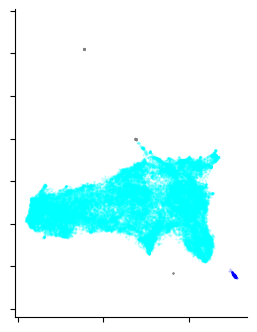

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


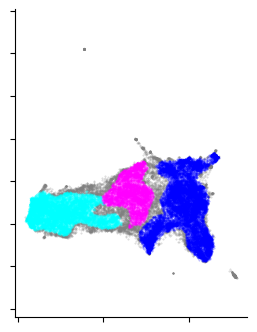

['Group 0', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
0 Group 0
1 Group 1
2 Group 2
3 Group 3
4 Group 4
5 Group 5


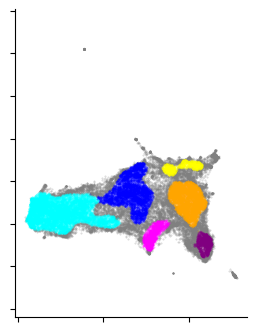

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


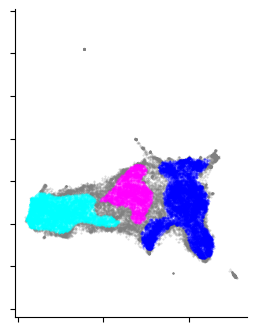

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


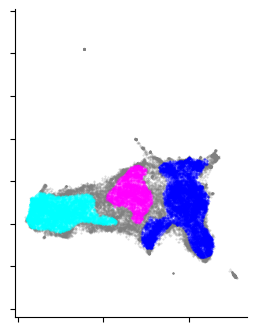

['Group 0', 'Group 1', 'Group 2', 'Group 3']
0 Group 0
1 Group 1
2 Group 2
3 Group 3


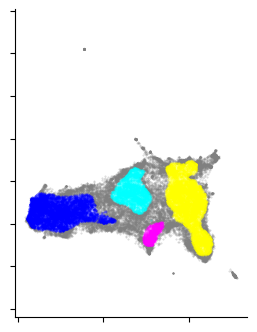

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


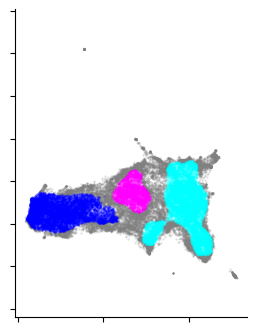

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


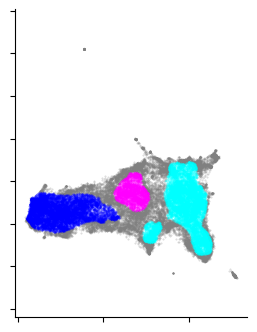

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


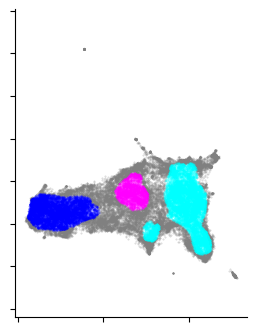

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


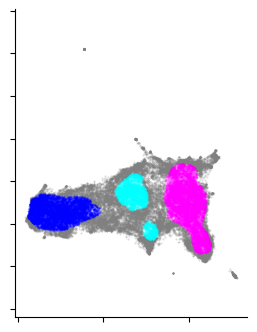

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


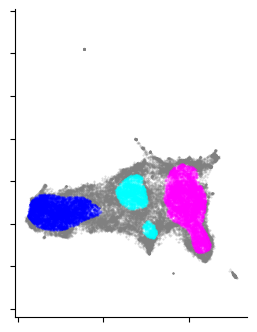

['Group 0', 'Group 1']
0 Group 0
1 Group 1


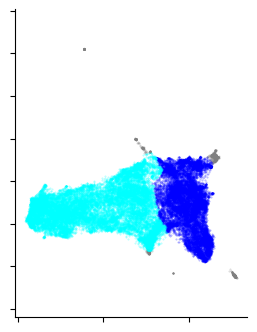

['Group 0', 'Group 1', 'Group 2']
0 Group 0
1 Group 1
2 Group 2


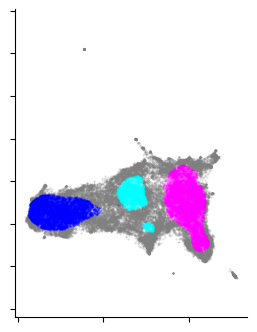

['Group 0', 'Group 1']
0 Group 0
1 Group 1


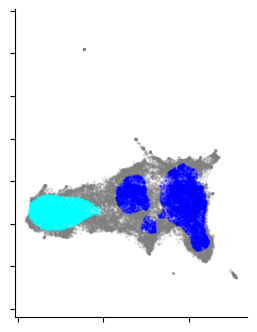

['Group 0', 'Group 1']
0 Group 0
1 Group 1


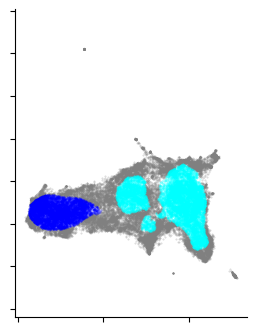

['Group 0', 'Group 1']
0 Group 0
1 Group 1


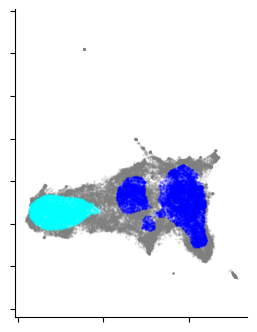

['Group 0', 'Group 1']
0 Group 0
1 Group 1


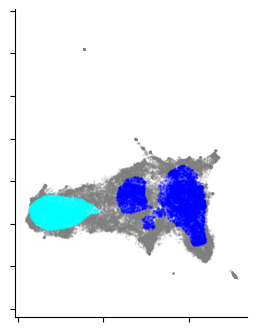

['Group 0', 'Group 1']
0 Group 0
1 Group 1


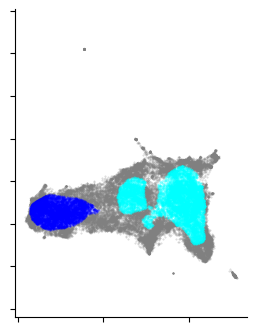

['Group 0', 'Group 1']
0 Group 0
1 Group 1


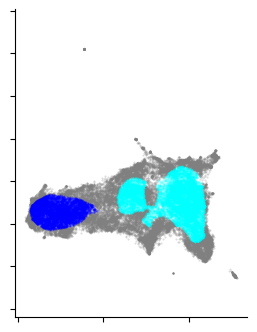

['Group 0', 'Group 1']
0 Group 0
1 Group 1


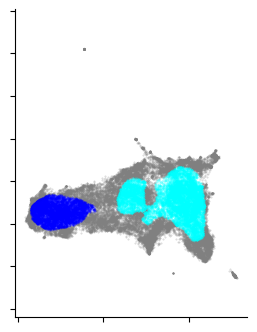

In [79]:
import matplotlib.pyplot as plt
plt.style.use('default')


cmap = [ 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink', 'brown']

embeddings_ = reducer_embeddings
for min_c in cluster_ami.keys():

    plt_assignments = cluster_ami[min_c]['assignments']

    unique_classes = np.unique(plt_assignments)
    group_types = []
    group_types.extend(['Group {}'.format(i) for i in unique_classes if i >= 0])
    print(group_types)

    fig = plt.figure(figsize=(3, 4))
    ax = fig.add_subplot()
    for b in unique_classes:
        if b == -1:
            idx_b_embed = np.where(plt_assignments==int(b))[0]
            ax.scatter(embeddings_[idx_b_embed, 0],
                       embeddings_[idx_b_embed, 1],
                       s=0.2, alpha=0.3, c='grey'
                       , label= "Noise")
        else:
            print(b, group_types[int(b)])
            idx_b_embed = np.where(plt_assignments==int(b))[0]
            ax.scatter(embeddings_[idx_b_embed, 0],
                       embeddings_[idx_b_embed, 1],
                       s=0.2,
                       alpha=0.3,
                       c=cmap[int(b)],
                       label=group_types[int(b)])
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    color_name = "k"
    ax.spines["bottom"].set_color(color_name)
    ax.spines["left"].set_color(color_name)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)

    #plt.title('UMAP embedding of all samples (Feature bin = {} ms / {} frames)'.format(int(1/30*bin *1000), bin))
    plt.axis('equal')
    plt.savefig('../plots/Task1_HDBscan_assignments_min_c_{}.png'.format(min_c), dpi=300, bbox_inches='tight')
    plt.show()


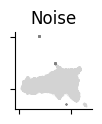

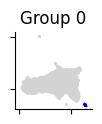

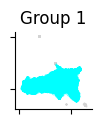

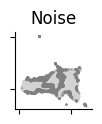

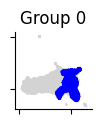

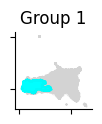

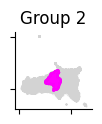

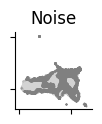

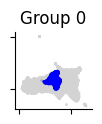

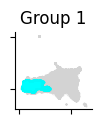

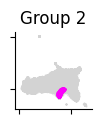

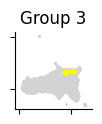

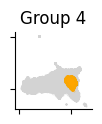

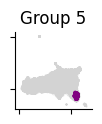

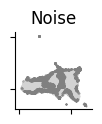

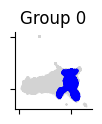

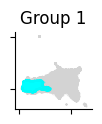

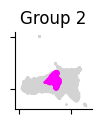

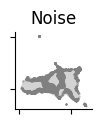

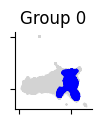

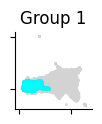

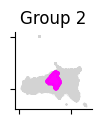

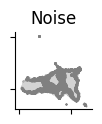

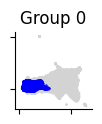

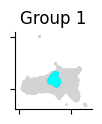

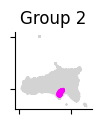

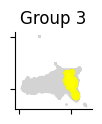

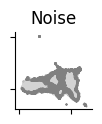

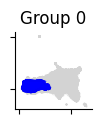

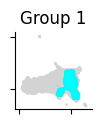

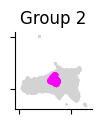

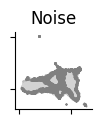

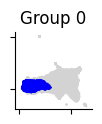

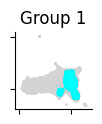

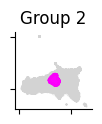

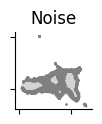

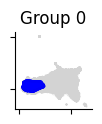

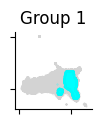

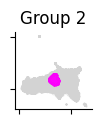

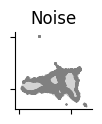

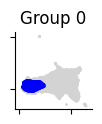

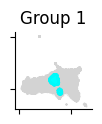

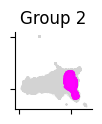

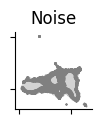

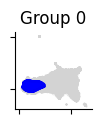

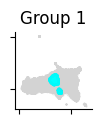

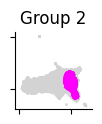

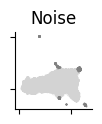

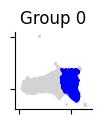

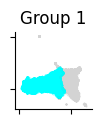

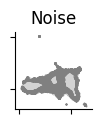

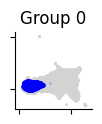

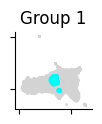

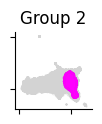

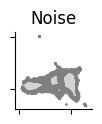

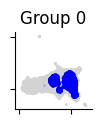

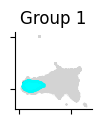

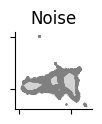

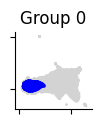

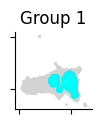

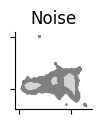

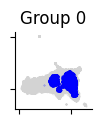

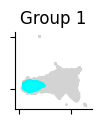

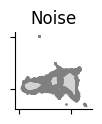

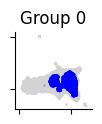

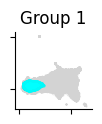

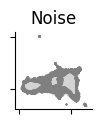

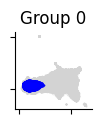

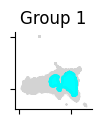

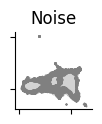

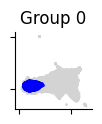

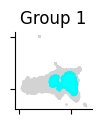

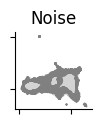

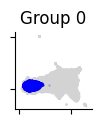

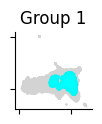

In [80]:
embeddings_ = reducer_embeddings
cmap = [ 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink', 'brown']

for min_c in cluster_ami.keys():

    plt_assignments = cluster_ami[min_c]['assignments']

    unique_classes = np.unique(plt_assignments)
    group_types = []
    group_types.extend(['Group {}'.format(i) for i in unique_classes if i >= 0])
    for b in np.unique(plt_assignments):
        if b == -1:
            fig, ax = plt.subplots(1, 1, figsize=(1, 1))
            idx_b_embed = np.where(plt_assignments==int(b))[0]
            idx_not_b = np.where(plt_assignments!=int(b))[0]
            ax.scatter(embeddings_[idx_not_b, 0],
                       embeddings_[idx_not_b, 1],
                       s=0.1, alpha=0.5, c='lightgray')
            ax.scatter(embeddings_[idx_b_embed, 0],
                       embeddings_[idx_b_embed, 1],
                       s=0.1, alpha=0.5, c='gray')
            title = "Noise"
        else:
            fig, ax = plt.subplots(1, 1, figsize=(1, 1))
            idx_b_embed = np.where(plt_assignments==int(b))[0]
            idx_not_b = np.where(plt_assignments!=int(b))[0]
            ax.scatter(embeddings_[idx_not_b, 0],
                       embeddings_[idx_not_b, 1],
                       s=0.1, alpha=0.5, c='lightgray')
            ax.scatter(embeddings_[idx_b_embed, 0],
                       embeddings_[idx_b_embed, 1],
                       s=0.1, alpha=0.5
                       , c=cmap[int(b)]
                       )
            title = group_types[int(b)]
        ax.set_title(title)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        color_name = "k"
        ax.spines["bottom"].set_color(color_name)
        ax.spines["left"].set_color(color_name)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.grid(False)
        plt.axis('equal')
        plt.savefig('../plots/Task1_HDBscan_clustering_min_c_{}_{}.png'.format(min_c, title), dpi=300, bbox_inches='tight')
        plt.show()

# confusion matrix between hdbscan and annotation

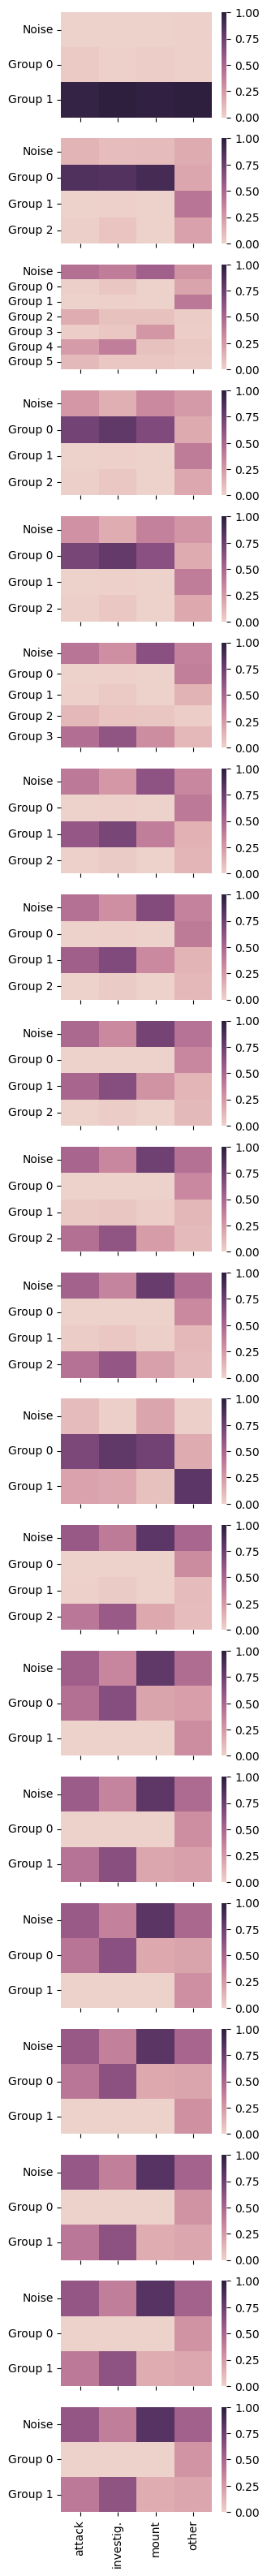

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
behavior_types = ['Other',  'Investigation', 'Mount', 'Attack']
cmap = ['crimson', 'darkorange', 'steelblue', 'k']

rows = len(cluster_ami.keys())
fig, ax = plt.subplots(rows, 1, figsize=(3, 2*rows), sharex=True)

for row, min_c in enumerate(cluster_ami.keys()):
    assignments = cluster_ami[min_c]['assignments']
    behave_dict = {x: None for x in np.unique(targets)}
    for num, beh in enumerate(behavior_types):
        idx_beh = np.where(targets==num)[0]
        behave_dict[num] = dict(zip(np.unique(assignments[idx_beh]), np.unique(assignments[idx_beh], return_counts=True)[1]))
    df = pd.DataFrame(behave_dict)
    #fill missing values with 0
    df.fillna(0, inplace=True)
    #normalize by total amount of samples per behavior
    df/=df.sum(axis=0)
    df = df.sort_index()

    group_types = ['Noise'] + ['Group {}'.format(i) for i in np.unique(assignments) if i >= 0]

    sns.heatmap(df.values,
                    cmap=sns.cubehelix_palette(as_cmap=True),
                    #square=True,
                    vmin=0, vmax=1, ax=ax[row])
    #ax[row].set_title('Feature bin = {} ms / {} frames'.format(int(1/30*bin *1000), bin))
    if row == rows-1:
        ax[row].set_xticks(np.arange(.5, 4.5, 1))
        ax[row].set_xticklabels(['attack', 'investig.', 'mount', 'other'], rotation=90)

    ax[row].set_yticklabels(group_types, rotation=0)
    ax[row].grid(False)
    #plt.axis('equal')
fig.savefig('../plots/assignment_clustering_confusion.svg', dpi=600)
plt.show()


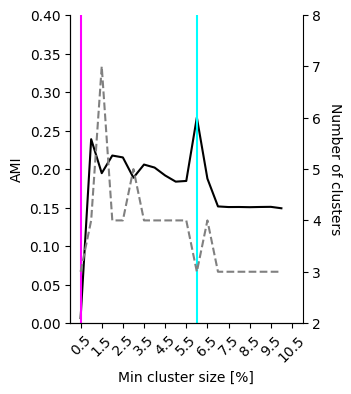

In [90]:
#plot min_c vs ami
# get all min_c values
cluster_range = list(cluster_ami.keys())
cluster_range.sort()
#get all ami values
ami = [cluster_ami[min_c]['ami'] for min_c in cluster_range]


fig, ax = plt.subplots(1, 1, figsize=(3, 4))
ax.plot(cluster_range, ami, c='k')
#highest ami
max_ami = np.max(ami)
max_ami_idx = np.argmax(ami)
ax.axvline(cluster_range[max_ami_idx], c='cyan',label='max AMI = {:.2f}'.format(max_ami))
#lowest ami
min_ami = np.min(ami)
min_ami_idx = np.argmin(ami)
ax.axvline(cluster_range[min_ami_idx], c='magenta',label='min AMI = {:.2f}'.format(min_ami))

ax.set_xlabel('Min cluster size [%]')
ax.set_ylabel('AMI')
ax.set_ylim([0, 0.4])
ax.set_xticks(np.arange(cluster_range[0], cluster_range[-1]+1, 1),
              np.arange(cluster_range[0], cluster_range[-1]+1, 1),
              rotation=45
              )
ax.set_xlim([cluster_range[0]-0.5, cluster_range[-1]+1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(False)

ax2 = ax.twinx()
#plot cluster number across min c
cluster_sizes = [len(np.unique(cluster_ami[min_c]['assignments'])) for min_c in cluster_range]
ax2.plot(cluster_range, cluster_sizes
         , c='grey'
         , ls='--')

ax2.set_ylabel('Number of clusters', rotation=270, labelpad=15)
ax2.set_ylim([min(cluster_sizes)-1, max(cluster_sizes)+1])
ax2.spines['top'].set_visible(False)
ax2.grid(False)



#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.savefig('../plots/Task1_HDBscan_ami_vs_min_c.svg  ', dpi=300, bbox_inches='tight', transparent=True)
plt.show()